In [41]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , KFold , cross_val_score , GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler , RobustScaler , LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,recall_score , roc_auc_score , plot_confusion_matrix , plot_precision_recall_curve , plot_roc_curve

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
df = pd.read_csv('/content/drive/My Drive/forestfires.csv')
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


In [44]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [45]:
df.drop(['dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep'],axis = 1,inplace = True)

In [46]:
df.shape

(517, 12)

In [47]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [48]:
df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 48.6+ KB


# Data Visualization

In [50]:
df['size_category'].unique()

array(['small', 'large'], dtype=object)

## FFMC vs Size of fire

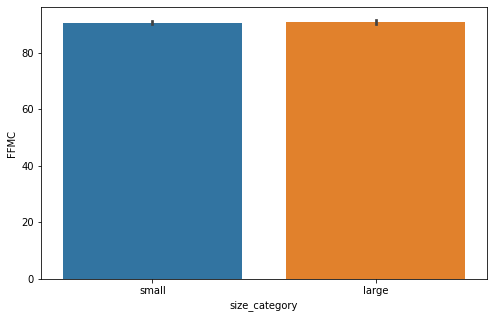

In [51]:
plt.figure(figsize = (8,5))
sns.barplot(y = df['FFMC'] , x = df['size_category'])

#### FFMC index is around 100 for both small and large fires

## DMC vs Size

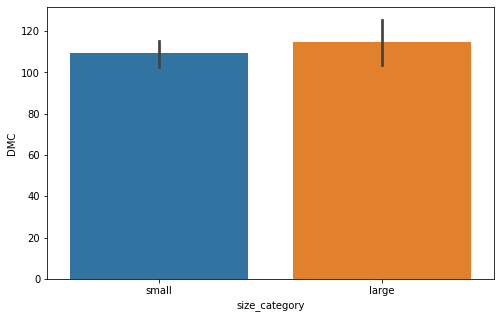

In [52]:
plt.figure(figsize = (8,5))
sns.barplot(y = df['DMC'] , x = df['size_category'])

In [53]:
df[df['size_category'] == 'small']['DMC'].mean(), df[df['size_category'] == 'large']['DMC'].mean()

(109.52539682539685, 114.5352517985611)

#### Mean DMC index is around 110 for small fires and 115 for large fires

## DC vs Size

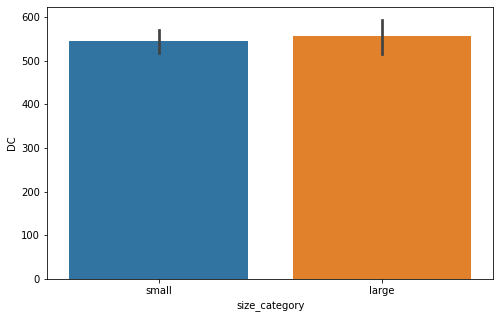

In [54]:
plt.figure(figsize = (8,5))
sns.barplot(y = df['DC'] , x = df['size_category'])

In [55]:
df[df['size_category'] == 'small']['DC'].mean(), df[df['size_category'] == 'large']['DC'].mean()

(545.020370370371, 555.8798561151082)

#### Mean DC Index is around 545 for small fires and 556 for large fires

## ISI vs Size

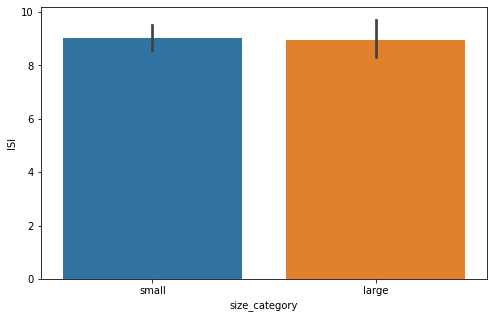

In [56]:
plt.figure(figsize = (8,5))
sns.barplot(y = df['ISI'] , x = df['size_category'])

In [57]:
df[df['size_category'] == 'small']['ISI'].mean(), df[df['size_category'] == 'large']['ISI'].mean()

(9.04576719576719, 8.95611510791367)

#### Mean ISI Index is around 9 for small and large fire

# Temp vs Humidity over months

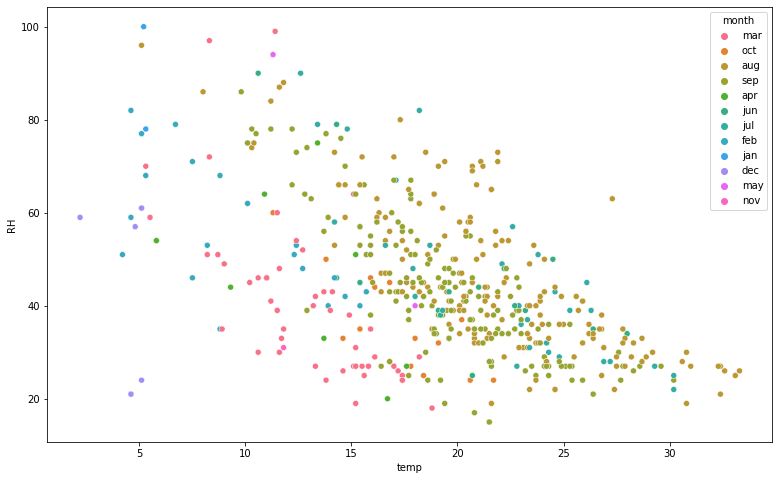

In [58]:
plt.figure(figsize = (13,8))
sns.scatterplot(x = df['temp'],y=df['RH'],hue=df['month'])

#### August month a wide range of humidity % over temperature. We can check how many large fires have broke during this month<br>There are some cases in january when there is high humidity% even on low temperatures<br>Overall trend suggests that as the temperature increases, the humidity decreases

## Rain over months

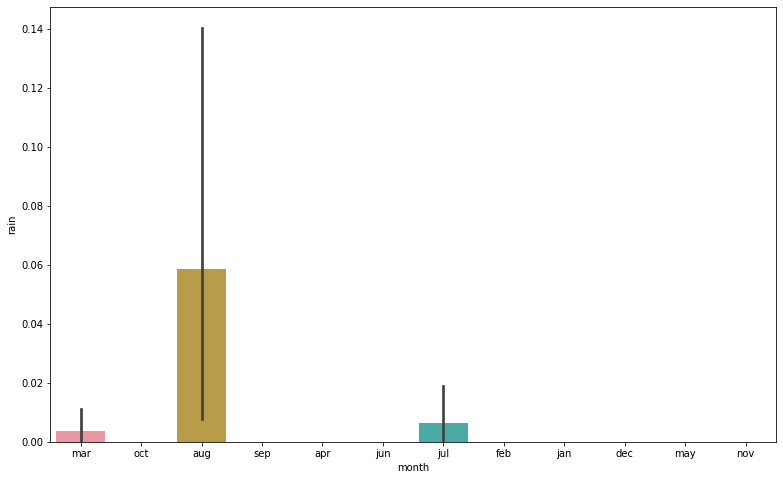

In [59]:
plt.figure(figsize = (13,8))
sns.barplot(y=df['rain'],x=df['month'])

#### The precipitation is highest in the month of August<br>Some precipitation can be observed in the month of March and July

In [60]:
label = LabelEncoder()
df['size_category'] = label.fit_transform(df['size_category'])

## No. of small fires broke over months

Text(0.5, 1.0, 'No. of small fires over months')

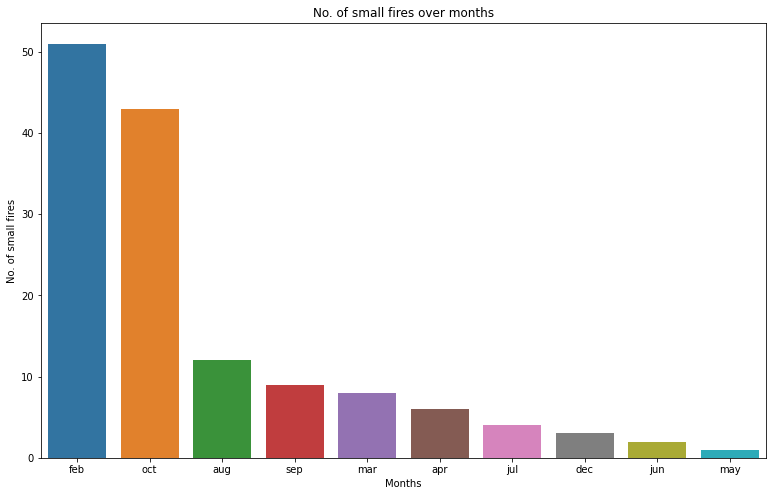

In [61]:
plt.figure(figsize = (13,8))
sns.barplot(y=df[df['size_category']==0]['month'].value_counts(),x=df[df['size_category']==0]['month'].unique())
plt.ylabel('No. of small fires')
plt.xlabel('Months')
plt.title('No. of small fires over months')

#### Highest no. of small fires broke in the month of February

## No. of large fires broke over months

Text(0.5, 1.0, 'No. of large fires over months')

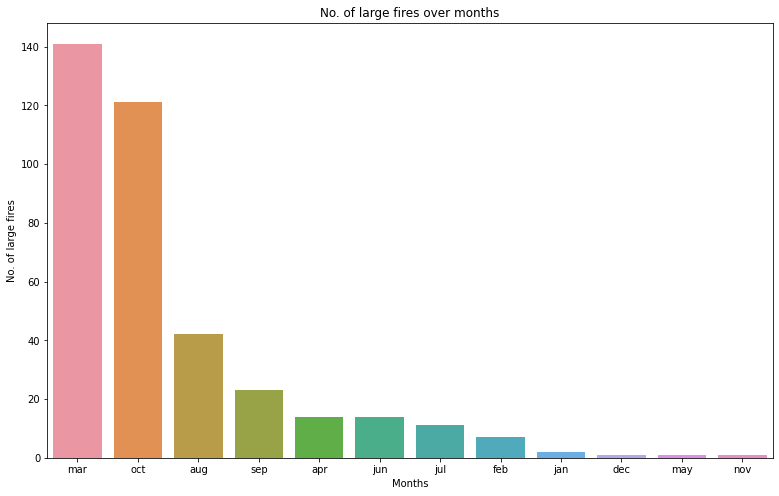

In [62]:
plt.figure(figsize = (13,8))
sns.barplot(y=df[df['size_category']==1]['month'].value_counts(),x=df[df['size_category']==1]['month'].unique())
plt.ylabel('No. of large fires')
plt.xlabel('Months')
plt.title('No. of large fires over months')

#### Most of the large fires broke over the month of March followed by October

## Total no. of fires broke over months

Text(0.5, 1.0, 'No. of fires over months')

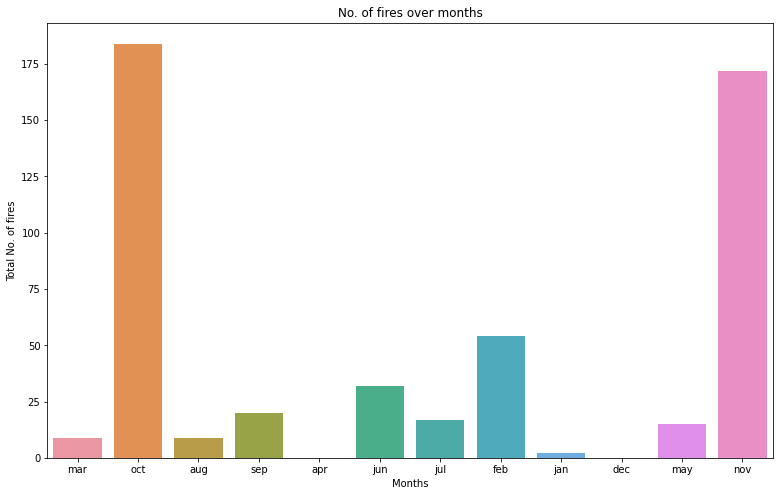

In [63]:
plt.figure(figsize = (13,8))
sns.barplot(y=(df[df['size_category']==0]['month'].value_counts() + df[df['size_category']==1]['month'].value_counts()),x=df['month'].unique())
plt.ylabel('Total No. of fires')
plt.xlabel('Months')
plt.title('No. of fires over months')

## Correlation plot

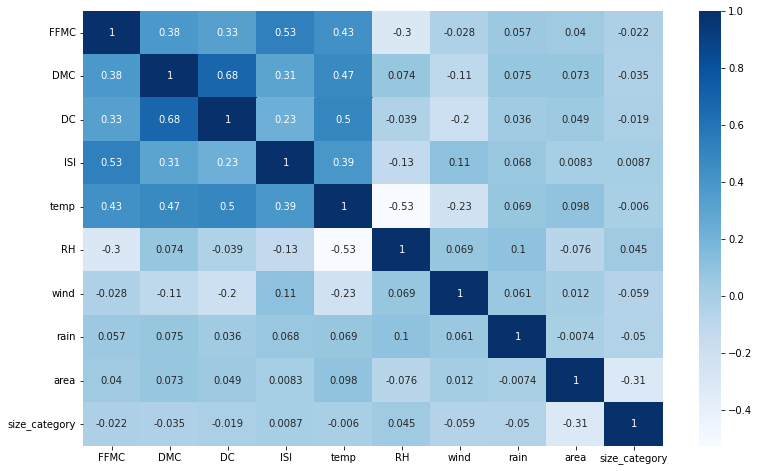

In [64]:
plt.figure(figsize = (13,8))
sns.heatmap(df.corr(), annot = True , cmap = 'Blues')

## Null Values

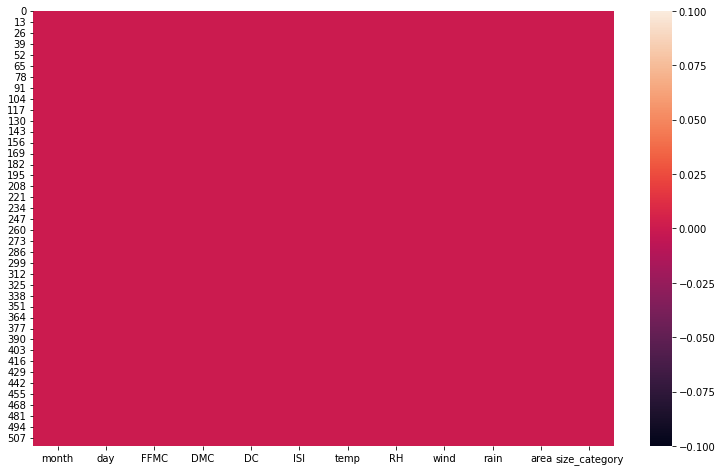

In [65]:
plt.figure(figsize = (13,8))
sns.heatmap(df.isnull())

#### 0 null values

# Pre-Processing

## One-Hot Encoding

In [66]:
df = pd.get_dummies(df, drop_first=True)

In [67]:
df.shape

(517, 27)

In [68]:
df.columns

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'size_category', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'day_mon', 'day_sat', 'day_sun', 'day_thu',
       'day_tue', 'day_wed'],
      dtype='object')

## Data-Splitting

In [69]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.20, random_state=42)
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((413, 26), (104, 26), (413,), (104,))

## Data Normalisation

In [70]:
scale = MinMaxScaler()

In [71]:
X = scale.fit_transform(X)

# Modelling

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

In [73]:
# create model
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [74]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = 5,verbose = 10)
grid_result = grid.fit(X,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............ batch_size=10, epochs=10, score=0.923, total=   2.0s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.875, total=   1.9s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.0s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.874, total=   2.1s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.1s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.893, total=   1.9s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    8.0s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.893, total=   3.6s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.6s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.875, total=   6.4s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   18.0s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.894, total=  11.0s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   29.0s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.874, total=  11.0s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   40.0s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.845, total=   6.8s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   46.8s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.874, total=   6.3s
[CV] batch_size=10, epochs=100 .......................................
[CV] ........... batch_size=10, epochs=100, score=0.894, total=  11.9s
[CV] batch_size=10, epochs=100 .......................................
[CV] ........... batch_size=10, epochs=100, score=0.904, total=  21.2s
[CV] batch_size=10, epochs=100 .......................................
[CV] ........... batch_size=10, epochs=100, score=0.893, total=  21.3s
[CV] batch_size=10, epochs=100 .......................................
[CV] ........... batch_size=10, epochs=100, score=0.903, total=  11.8s
[CV] batch_size=10, epochs=100 .......................................
[CV] ........... batch_size=10, epochs=100, score=0.883, total=  11.6s
[CV] batch_size=20, epochs=10 ........................................
[CV] ............ batch_size=20, epochs=10, score=0.933, total=   1.4s
[CV] batch_size=20, epochs=10 ........................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  4.3min finished


In [75]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.8992718458175659, using {'batch_size': 20, 'epochs': 100}
0.8916542053222656,0.017825889544265686 with: {'batch_size': 10, 'epochs': 10}
0.8722927570343018,0.01585323303350733 with: {'batch_size': 10, 'epochs': 50}
0.8955377101898193,0.007424250517562912 with: {'batch_size': 10, 'epochs': 100}
0.8955377101898193,0.026928218657513426 with: {'batch_size': 20, 'epochs': 10}
0.8781180024147034,0.019967186825051043 with: {'batch_size': 20, 'epochs': 50}
0.8992718458175659,0.03311522952668891 with: {'batch_size': 20, 'epochs': 100}
0.8724047780036926,0.027951057880495633 with: {'batch_size': 40, 'epochs': 10}
0.8839245676994324,0.010834052754216618 with: {'batch_size': 40, 'epochs': 50}
0.8781179904937744,0.008114658463456067 with: {'batch_size': 40, 'epochs': 100}


In [77]:
# Training model with best params
model = Sequential()
model.add(Dense(units=12, input_dim=X.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(units=8, kernel_initializer='normal', activation='relu'))
model.add(Dense(units = 1 , kernel_initializer='normal', activation = 'sigmoid'))
 
# Compiling the model
adam = Adam(lr = 0.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics = ['accuracy'])
 
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 40, epochs = 10, verbose=1)

Epoch 1/10
11/11 [==============================] - 1s 4ms/step - loss: 0.4110 - accuracy: 0.8862
Epoch 2/10
11/11 [==============================] - 0s 4ms/step - loss: 0.3515 - accuracy: 0.9007
Epoch 3/10
11/11 [==============================] - 0s 4ms/step - loss: 0.3394 - accuracy: 0.9007
Epoch 4/10
11/11 [==============================] - 0s 4ms/step - loss: 0.3270 - accuracy: 0.9007
Epoch 5/10
11/11 [==============================] - 0s 4ms/step - loss: 0.3246 - accuracy: 0.9007
Epoch 6/10
11/11 [==============================] - 0s 5ms/step - loss: 0.3273 - accuracy: 0.9007
Epoch 7/10
11/11 [==============================] - 0s 4ms/step - loss: 0.3165 - accuracy: 0.9007
Epoch 8/10
11/11 [==============================] - 0s 4ms/step - loss: 0.3356 - accuracy: 0.9007
Epoch 9/10
11/11 [==============================] - 0s 4ms/step - loss: 0.3467 - accuracy: 0.9007
Epoch 10/10
11/11 [==============================] - 0s 4ms/step - loss: 0.3249 - accuracy: 0.9007


#### Got 90% accuracy on predictions